# 1. Problem Statement
The goal of this project is to clean and perform exploratory data analysis (EDA) on a dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\Jeremy\OneDrive\Desktop\PROJECT\Cleaning and EDA\dirty_cafe_sales.csv")

# Displaying the first 5 rows
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [4]:
# Getting infomation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Columns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Dataset Shape: (10000, 8)

Dataset Columns: ['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date']

Data Types:
 Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [6]:
# Statistical summary of numerical columns
print("Statistical Summary of Numerical Columns:")
print(df[['Price Per Unit', 'Quantity', 'Total Spent']].describe())

# Value counts for categorical columns
print("\nUnique Items:")
print(df['Item'].value_counts().head())
print("\nPayment Methods:")
print(df['Payment Method'].value_counts())
print("\nLocations:")
print(df['Location'].value_counts())

Statistical Summary of Numerical Columns:
       Price Per Unit Quantity Total Spent
count            9821     9862        9827
unique              8        7          19
top               3.0        5         6.0
freq             2429     2013         979

Unique Items:
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Name: Item, dtype: int64

Payment Methods:
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: Payment Method, dtype: int64

Locations:
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: Location, dtype: int64


# Data Cleaning

1. Duplicate Removal: Identify and remove duplicate rows to ensure each transaction is unique.

In [7]:
# Checking if there are any duplicates
df.duplicated().sum()

0

There are no duplicate rows in the dataset.

In [8]:
# Checking for missing values
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [9]:
# Creating a function that cleans the column. (Replacing the missing values with 'Unknown')
def clean(column):
    # Getting the unique values and their count
    print(f"VALUE COUNTS BEFORE CHANGES\n{column.value_counts(dropna= False)}")

    # Replacing the missing values in the 'Item' column with 'Unknown'
    column = column.replace(to_replace= np.nan, value= 'Unknown')

    # Replacing 'ERROR' with 'Unknown'
    column = column.replace(to_replace= 'ERROR', value= 'Unknown')

    # Changing the format of all values to Title case
    column = column.str.title()

    # Getting the unique values and their count after changes
    print('\n')
    print(f"VALUE COUNTS AFTER CHANGES\n{column.value_counts(dropna= False)}")

    return column


In [ ]:
# Saving the changes made
df['Price Per Unit'] = clean(df['Price Per Unit'])
df['Item'] = clean(df['Item'])
df['Quantity'] = clean(df['Quantity'])
df['Total Spent'] = clean(df['Total Spent'])
df['Payment Method'] = clean(df['Payment Method'])
df['Location'] = clean(df['Location'])
df['Transaction Date'] = clean(df['Transaction Date'])


VALUE COUNTS BEFORE CHANGES
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
NaN         179
UNKNOWN     164
Name: Price Per Unit, dtype: int64


VALUE COUNTS AFTER CHANGES
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
Unknown     533
Name: Price Per Unit, dtype: int64
VALUE COUNTS BEFORE CHANGES
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
NaN          333
ERROR        292
Name: Item, dtype: int64




VALUE COUNTS AFTER CHANGES
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Unknown      969
Name: Item, dtype: int64
VALUE COUNTS BEFORE CHANGES
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
NaN         138
Name: Quantity, dtype: int64


VALUE COUNTS AFTER CHANGES
5          2013
2          1974
4          1863
3          1849
1          1822
Unknown     479
Name: Quantity, dtype: int64
VALUE COUNTS BEFORE CHANGES
6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444
25.0       259
7.5        237
1.0        232
4.5        225
1.5        205
NaN        173
UNKNOWN    165
ERROR      164
Name: Total Spent, dtype: int64


VALUE COUNTS AFTER CHANGES
6.0        979
12.0       939
3.0        930
4.0        923
20.0 

In [11]:
# Checking for missing values after cleaning
df.isna().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

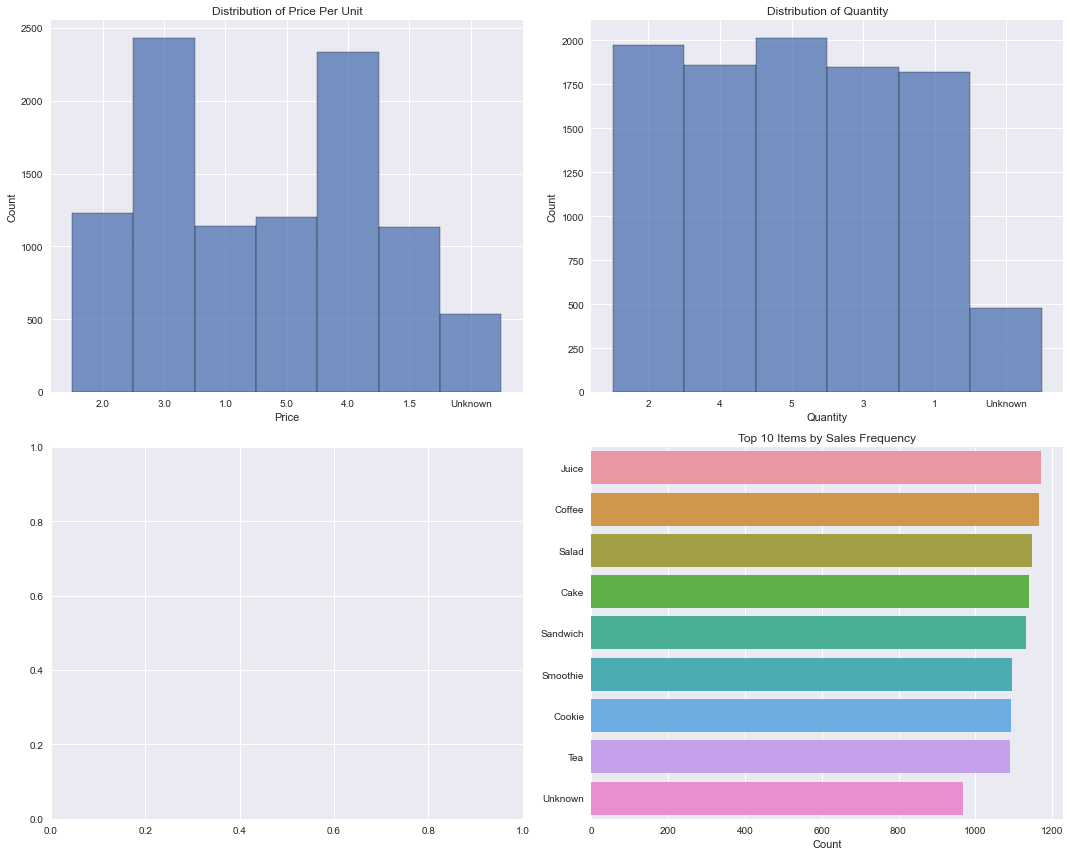

In [14]:
# Set up the plotting style
plt.style.use('seaborn')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot price distribution
sns.histplot(data=df, x='Price Per Unit', bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribution of Price Per Unit')
axes[0,0].set_xlabel('Price')
axes[0,0].set_ylabel('Count')

# Plot quantity distribution
sns.histplot(data=df, x='Quantity', bins=20, ax=axes[0,1])
axes[0,1].set_title('Distribution of Quantity')
axes[0,1].set_xlabel('Quantity')
axes[0,1].set_ylabel('Count')


# Plot top items by frequency
top_items = df['Item'].value_counts().head(10)
sns.barplot(x=top_items.values, y=top_items.index, ax=axes[1,1])
axes[1,1].set_title('Top 10 Items by Sales Frequency')
axes[1,1].set_xlabel('Count')

plt.tight_layout()
plt.show()

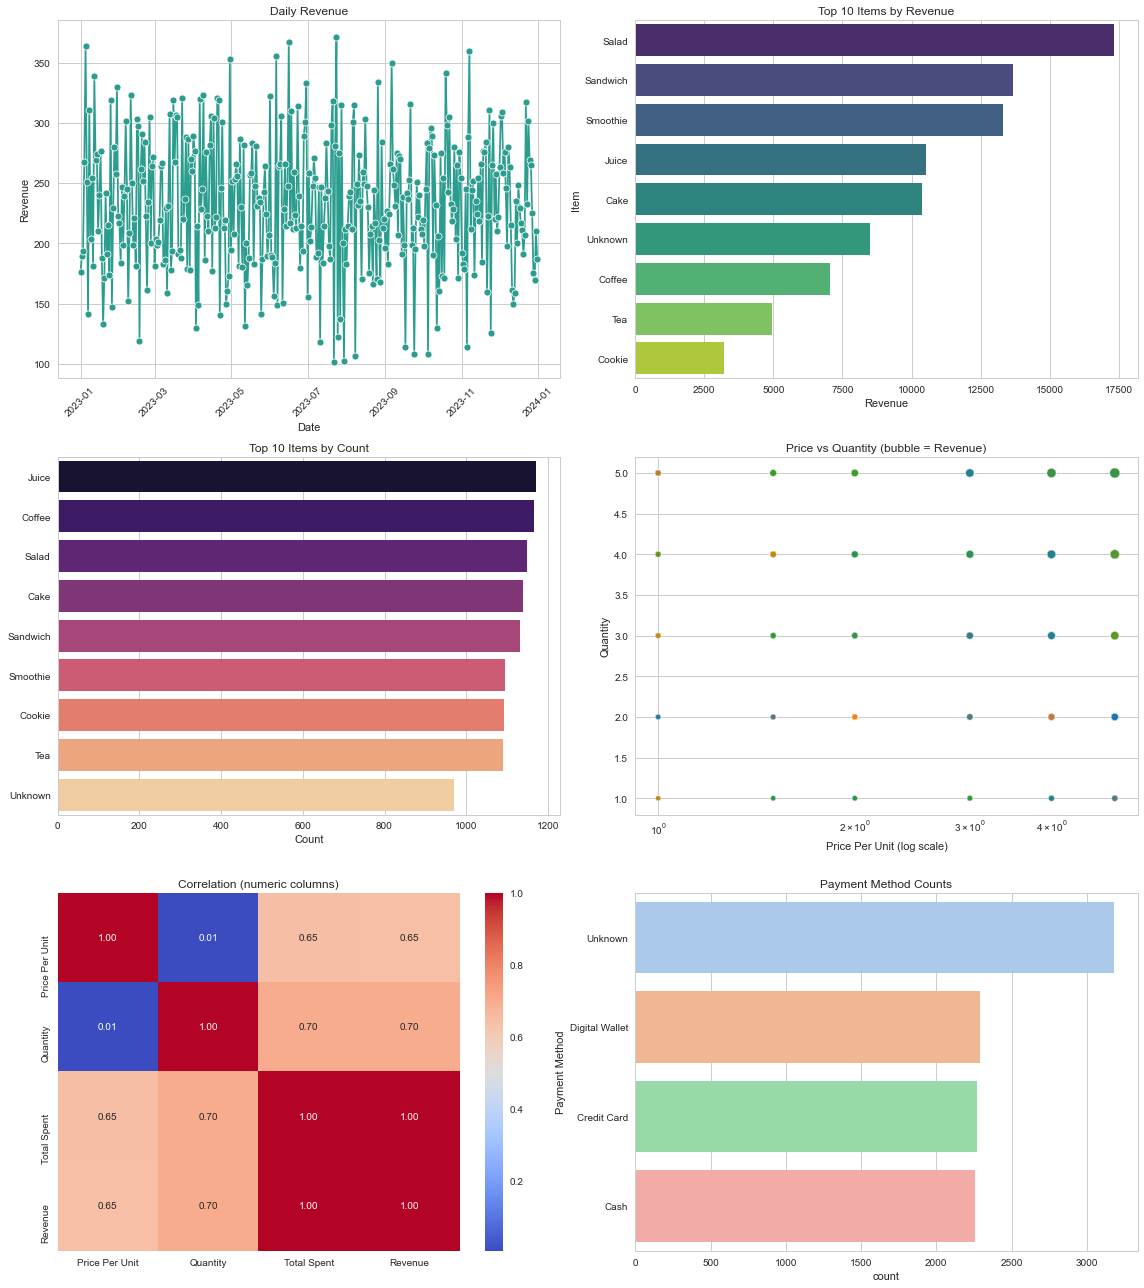

In [15]:
# Preprocess and create richer visualizations
import matplotlib.dates as mdates

# Coerce types safely
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

# Compute Revenue (prefer Quantity * Price; fall back to Total Spent)
df['Revenue'] = df['Quantity'] * df['Price Per Unit']
df['Revenue'] = df['Revenue'].fillna(df['Total Spent'])

# Prepare a working copy with valid dates
ts = df.dropna(subset=['Transaction Date']).copy()
ts['Date'] = ts['Transaction Date'].dt.date

# Aggregations
daily = ts.groupby('Date')['Revenue'].sum().reset_index()
top_rev = df.groupby('Item')['Revenue'].sum().sort_values(ascending=False).head(10)
top_cnt = df['Item'].value_counts().head(10)

# Plot style
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1) Daily revenue (time series)
try:
    sns.lineplot(data=daily, x='Date', y='Revenue', ax=axes[0,0], marker='o', color='#2a9d8f')
    axes[0,0].set_title('Daily Revenue')
    axes[0,0].set_ylabel('Revenue')
    axes[0,0].tick_params(axis='x', rotation=45)
except Exception as e:
    axes[0,0].text(0.5, 0.5, f"Daily revenue plot failed: {e}", ha='center')

# 2) Top 10 items by revenue
try:
    sns.barplot(x=top_rev.values, y=top_rev.index, ax=axes[0,1], palette='viridis')
    axes[0,1].set_title('Top 10 Items by Revenue')
    axes[0,1].set_xlabel('Revenue')
except Exception as e:
    axes[0,1].text(0.5, 0.5, f"Top revenue plot failed: {e}", ha='center')

# 3) Top 10 items by count
try:
    sns.barplot(x=top_cnt.values, y=top_cnt.index, ax=axes[1,0], palette='magma')
    axes[1,0].set_title('Top 10 Items by Count')
    axes[1,0].set_xlabel('Count')
except Exception as e:
    axes[1,0].text(0.5, 0.5, f"Top count plot failed: {e}", ha='center')

# 4) Price vs Quantity scatter (bubble sized by Revenue)
try:
    # sample to speed up plotting if very large
    sample_df = df.dropna(subset=['Price Per Unit','Quantity']).copy()
    if len(sample_df) > 5000:
        sample_df = sample_df.sample(5000, random_state=1)

    sns.scatterplot(data=sample_df, x='Price Per Unit', y='Quantity', size='Revenue', hue='Location', alpha=0.7, ax=axes[1,1], palette='tab10', legend=False)
    axes[1,1].set_title('Price vs Quantity (bubble = Revenue)')
    axes[1,1].set_xscale('log')
    axes[1,1].set_xlabel('Price Per Unit (log scale)')
except Exception as e:
    axes[1,1].text(0.5, 0.5, f"Scatter plot failed: {e}", ha='center')

# 5) Correlation heatmap for numeric columns
try:
    num_cols = ['Price Per Unit','Quantity','Total Spent','Revenue']
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[2,0], fmt='.2f')
    axes[2,0].set_title('Correlation (numeric columns)')
except Exception as e:
    axes[2,0].text(0.5, 0.5, f"Heatmap failed: {e}", ha='center')

# 6) Payment method counts
try:
    order = df['Payment Method'].value_counts().index
    sns.countplot(data=df, y='Payment Method', order=order, ax=axes[2,1], palette='pastel')
    axes[2,1].set_title('Payment Method Counts')
except Exception as e:
    axes[2,1].text(0.5, 0.5, f"Payment method plot failed: {e}", ha='center')

plt.tight_layout()
plt.show()